## Predicting Abalone's age from its physical measurement 
***
### Author: <font color='gray'>Anish Shrestha</font>
#### Dataset provided by:<font color='gray'> Data Science Dojo</font>
#### Link to dataset: https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Abalone


## Dataset Info

__Level: Beginner__ <br>
__Recommended Use: Regression Models__<br>
__Domain: Environment__<br>

<p>Data set has 4177 rows and 9 columns and physical measurements of abalones and the number of rings (representing age).</p>

__Data Dictionary__
![Data Dictionary](dict.png)

In [297]:
# Importing reuired libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

In [298]:
# reading data file using pandas and taking a peek on the data

data = pd.read_csv('data.csv')
data.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [299]:
# as you can see there are no any header on the dataset
# so, now we are adding header to each column by looking at the data dictionary

headers = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
data = pd.read_csv('data.csv', sep=",", names=headers)

In [300]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [301]:
data['age'] = data['Rings'] + 1.5 # as said on the description above 
data.drop('Rings', axis=1, inplace=True)
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


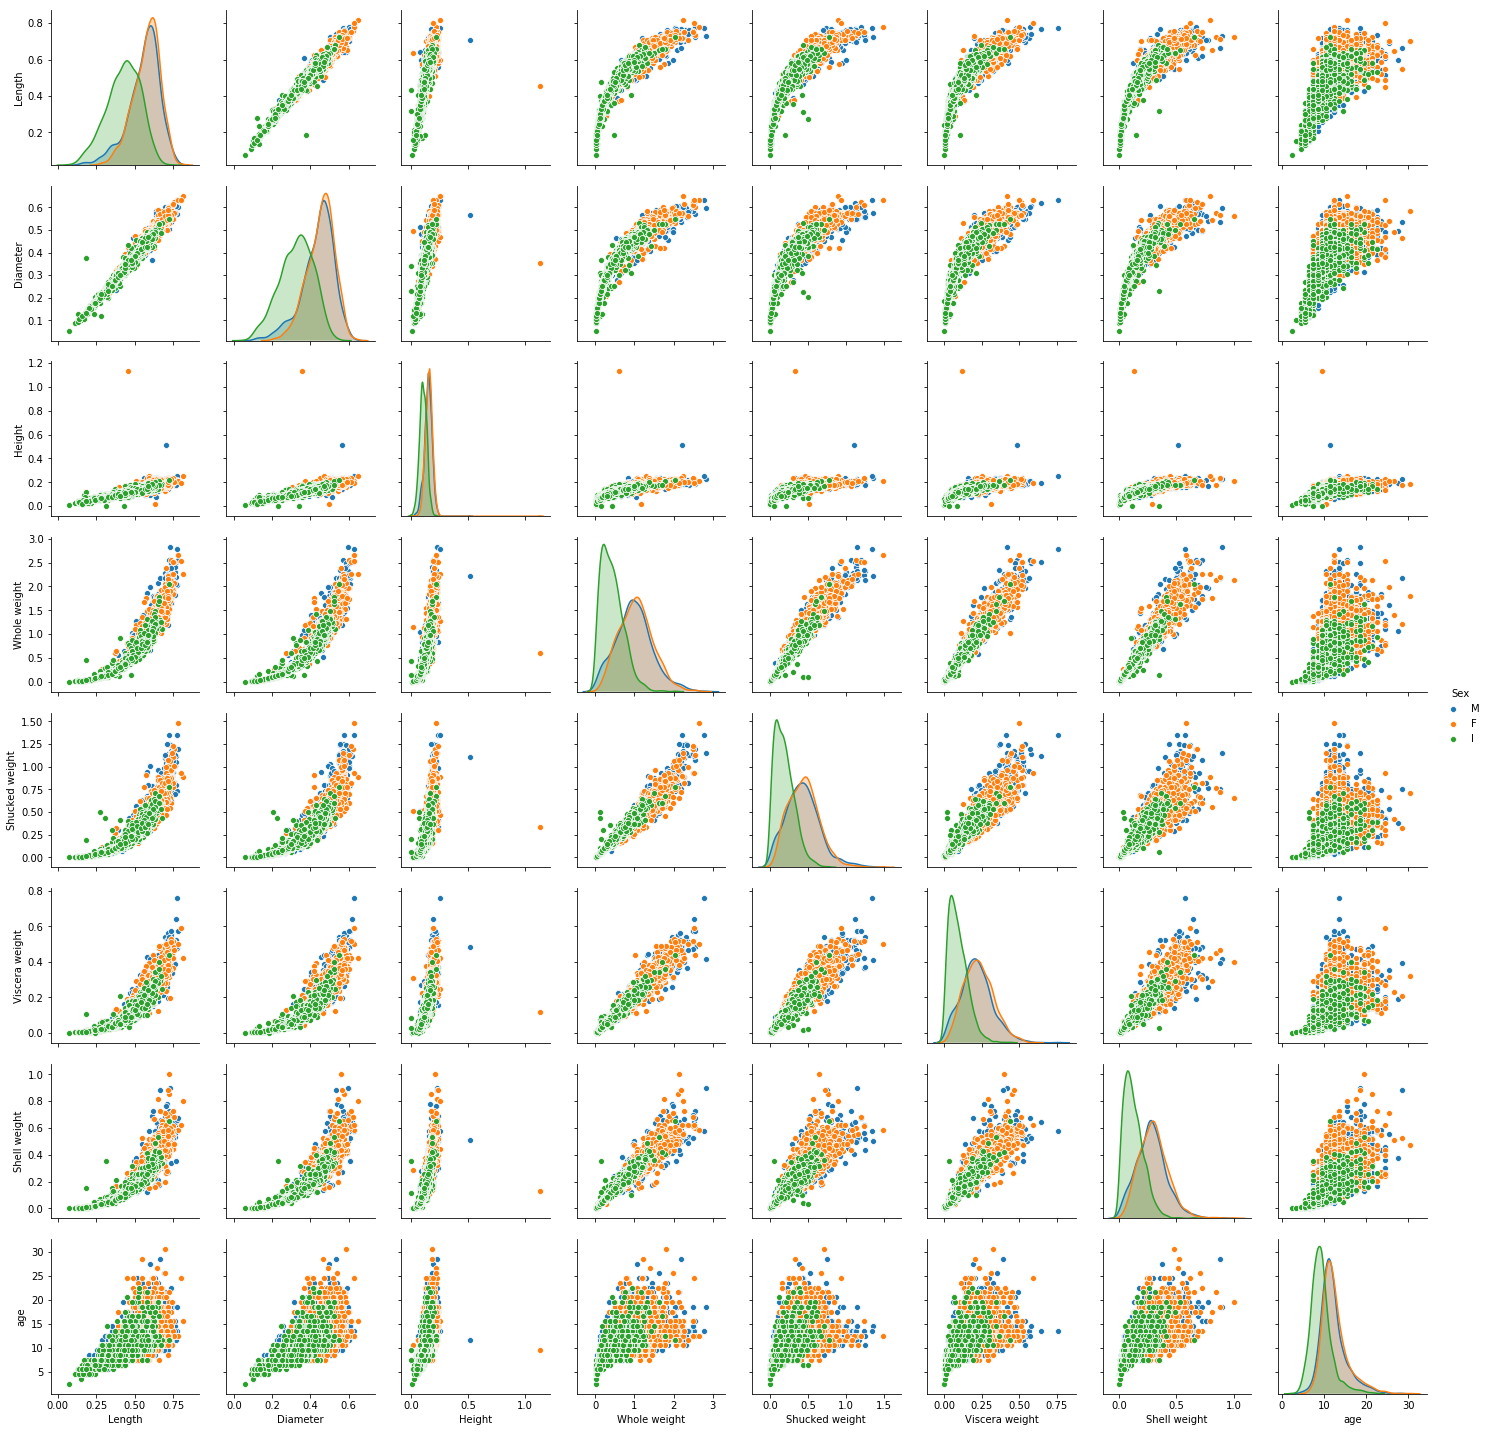

In [302]:
sns.pairplot(data, hue="Sex")

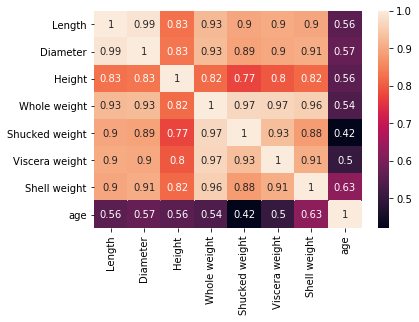

In [303]:
corr = data.corr()
sns.heatmap(corr, annot=True)

### From the obsorvations above, we can see that 
<ol>
<li> length and diameter are highly correlated</li>
<li> Whole weight is sum of all other weights</li>
<li> Height feature has min value 0</li>
</ol>

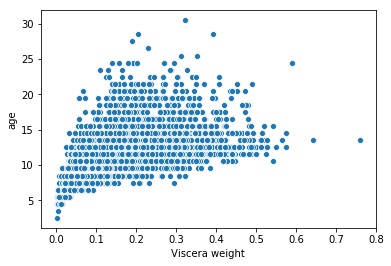

In [304]:
# now its time to check for outliers and eliminate them

sns.scatterplot(x=data['Viscera weight'], y=data['age'])

In [305]:
data = data[(data['Viscera weight'] < 0.6)]

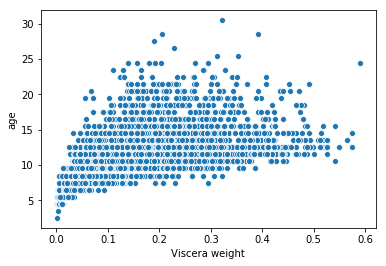

In [306]:
sns.scatterplot(x=data['Viscera weight'], y=data['age'])

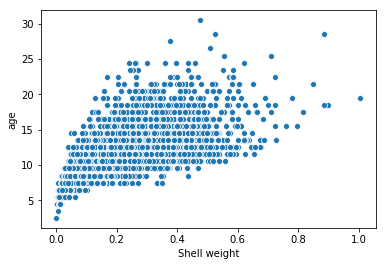

In [307]:
sns.scatterplot(x=data['Shell weight'], y=data['age'])

In [308]:
data = data[(data['Shell weight'] < 0.8) ]

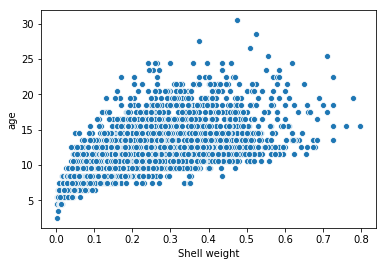

In [309]:
sns.scatterplot(x=data['Shell weight'], y=data['age'])

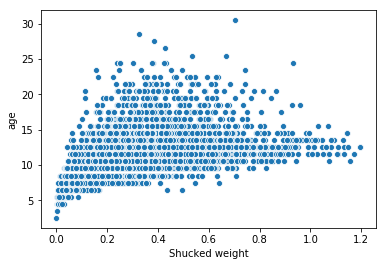

In [310]:
data = data[(data['Shucked weight'] < 1.2)]

sns.scatterplot(x=data['Shucked weight'], y=data['age'])

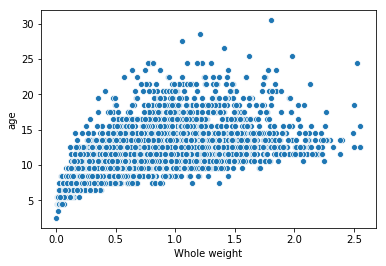

In [311]:
sns.scatterplot(x=data['Whole weight'], y=data['age'])

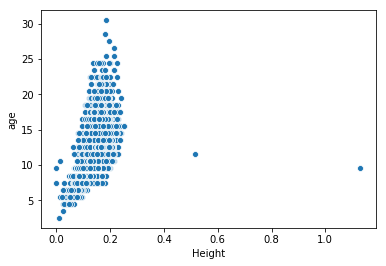

In [312]:
sns.scatterplot(x=data['Height'], y=data['age'])

In [313]:
data.drop(data[(data['Height']>0.4) & (data['age'] < 15)].index, inplace=True)
data.drop(data[(data['Height']<0.4) & (data['age'] > 25)].index, inplace=True)

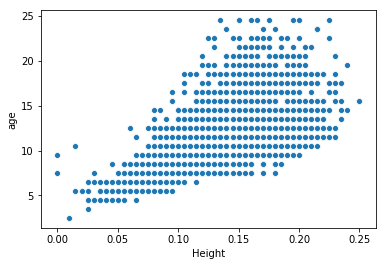

In [314]:
sns.scatterplot(x=data['Height'], y=data['age'])

In [315]:
sex_map = {"M": 0, "F": 1, "I": 2}
data['Sex'] = data['Sex'].map(sex_map)
data.head()  

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [316]:
# preparing features and labels for ML model

X = data.drop('age', axis = 1)
y = data['age']

standardScale = StandardScaler()
standardScale.fit_transform(X)

selectkBest = SelectKBest(k=4)
X_new = selectkBest.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=15)

### Evaluate Different ML Models

In [317]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score


np.random.seed(10)
def score_cv(model, X, y):
    score = (cross_val_score(model, X, y, scoring='r2', cv=5))
    return(score)

models = [LinearRegression(),
             Ridge(),
             SVR(gamma='auto'),
             RandomForestRegressor(n_estimators=10),
             GradientBoostingRegressor(),
             KNeighborsRegressor(n_neighbors = 4),]

names = ['LR','Ridge','svm','GNB','RF','GB','KNN']

for model,name in zip(models,names):
    score = score_cv(model,X_train,y_train)
    print("{}    : SCORE: {}".format(name, score.mean()))

LR    : SCORE: 0.5301818591841178
Ridge    : SCORE: 0.525418280383004
svm    : SCORE: 0.4259001339053767
GNB    : SCORE: 0.49657576385330476
RF    : SCORE: 0.5442577325814179
GB    : SCORE: 0.49483672081565205


In [318]:
# using Random Forest Regressor

clf = RandomForestRegressor(n_estimators=10)
clf.fit(X_train, y_train)


yHat = clf.predict(X_test)

dummy = pd.concat([pd.DataFrame(list(yHat), columns=['Predicted Value']), 
           pd.DataFrame(list(y), columns=['Real Value'])], axis = 1)
dummy.head()

,Predicted Value,Real Value
0,14.9,16.5
1,9.5,8.5
2,13.2,10.5
3,9.1,11.5
4,10.2,8.5
